In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/Github/Colab_Notebook

/content/drive/MyDrive/Colab Notebooks/Github/Colab_Notebook


In [ ]:
!git config --global user.email 'inseop.hwang@hotmail.com'
!git config --global user.name 'Hot-Kimchi'

In [ ]:
!git add .
!git status
!git add 8_3_2_Pretrained_finetuning.ipynb

On branch main
Your branch is up to date with 'origin/main'.

Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
	new file:   8_3_2_Pretrained_finetuning.ipynb



In [ ]:
!git commit -m 'finefuning method for CNN'
!git push -u origin main

[main e7f6ea5] finefuning method for CNN
 1 file changed, 1 insertion(+)
 create mode 100644 8_3_2_Pretrained_finetuning.ipynb
Enumerating objects: 4, done.
Counting objects: 100% (4/4), done.
Delta compression using up to 2 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 385.35 KiB | 9.63 MiB/s, done.
Total 3 (delta 0), reused 0 (delta 0)
To https://github.com/Hot-KimChi/Colab_Notebook.git
   e7c9ba9..e7f6ea5  main -> main
Branch 'main' set up to track remote branch 'main' from 'origin'.


>### Data download

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import gdown
gdown.download(id='18uC7WTuEXKJDDxbj-Jq6EjzpFrgE7IAd', output='dogs-vs-cats.zip')

Downloading...
From: https://drive.google.com/uc?id=18uC7WTuEXKJDDxbj-Jq6EjzpFrgE7IAd
To: /content/dogs-vs-cats.zip
100%|██████████| 852M/852M [00:16<00:00, 50.4MB/s]


'dogs-vs-cats.zip'

In [ ]:
!unzip -qq dogs-vs-cats.zip
!unzip -qq train.zip

In [ ]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


>### 작은 이미지 데이터셋에 딥러닝을 적용하는 일반적이고 매우 효과적인 방법
- 사전 훈련된 모델 사용(pretrained model): ex) 1400만개의 레이블된 이미지 데이터 & 대규모 컨브넷
  - 1) 특성 추출
  - 2) 미세 조정

>#### 2) 사전 훈련된 모델 미세 조정하기
- 미세 조정
  - 특성 추출에 사용했던 동결 모델의 상위 층 몇 개를 동결에서 해제하고 모델에 새로 추가한 층과 함께 훈련하는 것
  - 새로 추가한 밀집 연결분류기가 먼저 훈련
  - 합성곱 기반의 상위 층 미세조정
    - 밀집 연결 분류기가 미리 훈련되지 않으면 훈련되는 동안 너무 큰 오차 신호가 네트워크에 전파

  <img src='https://drive.google.com/uc?export=download&id=1-Rxyk9vmKWs90rztZooaAMFMtlF1-23d' width="" height ="" /><br>


  - 미세 조정 단계
    - 1. 사전에 훈련된 기반 네트워크 위에 새로운 네트워크 추가
    - 2. 기반 네트워크 동결
    - 3. 새로 추가한 네트워크 훈련
    - 4. 기반 네트워크 일부 층의 동결을 해제
    - 5. 동결을 해제한 층과 새로 추가한 층을 함께 훈련




>#### 그림 파일 추출

In [ ]:
url="https://drive.google.com/file/d/1-Rxyk9vmKWs90rztZooaAMFMtlF1-23d/view?usp=share_link" 
path='https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
size="width=\"\" "+"height =\"\" "
tag="<img src='"+path+"' "+size+"/><br>"
print(" ▶ Path : ", path)
print('\n',"▶ Tag : ", tag)

 ▶ Path :  https://drive.google.com/uc?export=download&id=1-Rxyk9vmKWs90rztZooaAMFMtlF1-23d

 ▶ Tag :  <img src='https://drive.google.com/uc?export=download&id=1-Rxyk9vmKWs90rztZooaAMFMtlF1-23d' width="" height ="" /><br>


>#### Pretrained model

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

conv_base_fine = keras.applications.vgg16.VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(180, 180, 3)
)

58889256/58889256 [==============================] - 4s 0us/step


In [ ]:
conv_base_fine.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

>### 마지막 3개의 합성곱 층을 미세 조정
- block1_conv1 - block4_pool까지 모든 층은 동결
- block5 층은 학습 대상.
- 왜 더 많은 층을 미세 조정하지 않는 지?
  - 층에 따른 특성의 차이
    - 합성곱 기반층 중 하위층은 좀 더 일반적 특성
    - 상위층은 좀 더 특화된 특성
    - 새로운 문제에 재활용에 필요 --> 구체적인 특성 필요
  - 훈련 파라미터 많을수록 과대적합 위험이 커진다.
    - 이러한 이유로 기반층 최상위 2-3개 층만 미세조정하는 것이 좋다.

In [ ]:
## 마지막 네번째 층까지 모든 층 동결하기
conv_base_fine.trainable = True
for layer in conv_base_fine.layers[:-4]:
  layer.trainable = False

print('합성곱 기반 층 부분 동결 후의 훈련 가능한 가중치 개수:', 
      len(conv_base_fine.trainable_weights))

합성곱 기반 층 부분 동결 후의 훈련 가능한 가중치 개수: 6


>#### 이 모델의 미세 조정 시작
- 학습률을 낮춘 RMSProp 옵티마이저 사용
  - 낮춘 이유
    - 미세 조정하는 3개의 층에서 학습된 표현을 조금 씩 수정하기 위해서, 
    - 변경량이 너무 크면 학습된 표현에 나쁜 영향.

In [ ]:
## 데이터 증식단계 추가하기
data_augmentation = keras.Sequential(
    [        
        layers.RandomFlip('horizontal'),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

##밀집 분류기를 합성곱 기반 층에 추가하기
inputs = keras.Input(shape=(180, 180, 3))

x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)    ## 입력값의 스케일 조정
x = conv_base_fine(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(1, activation='sigmoid')(x)

In [ ]:
model_fine = keras.Model(inputs, outputs)
model_fine.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=['accuracy'])

callbacks = [keras.callbacks.ModelCheckpoint(
    filepath='fine_tuning.keras',
    save_best_only=True,
    monitor='val_loss')
]

history = model_fine.fit(
    train_dataset,
    epochs=30, 
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 28s 216ms/step - loss: 3.8767 - accuracy: 0.7375 - val_loss: 0.7401 - val_accuracy: 0.9140
Epoch 2/30
63/63 [==============================] - 11s 174ms/step - loss: 1.1985 - accuracy: 0.8680 - val_loss: 0.4167 - val_accuracy: 0.9450
Epoch 3/30
63/63 [==============================] - 11s 175ms/step - loss: 0.6442 - accuracy: 0.9080 - val_loss: 0.3121 - val_accuracy: 0.9570
Epoch 4/30
63/63 [==============================] - 11s 176ms/step - loss: 0.4062 - accuracy: 0.9270 - val_loss: 0.2543 - val_accuracy: 0.9610
Epoch 5/30
63/63 [==============================] - 11s 171ms/step - loss: 0.3236 - accuracy: 0.9350 - val_loss: 0.2216 - val_accuracy: 0.9630
Epoch 6/30
63/63 [==============================] - 11s 171ms/step - loss: 0.2096 - accuracy: 0.9435 - val_loss: 0.2310 - val_accuracy: 0.9670
Epoch 7/30
63/63 [==============================] - 13s 194ms/step - loss: 0.1918 - accuracy: 0.9550 - val_loss: 0.2604 - val_accuracy: 0.9650

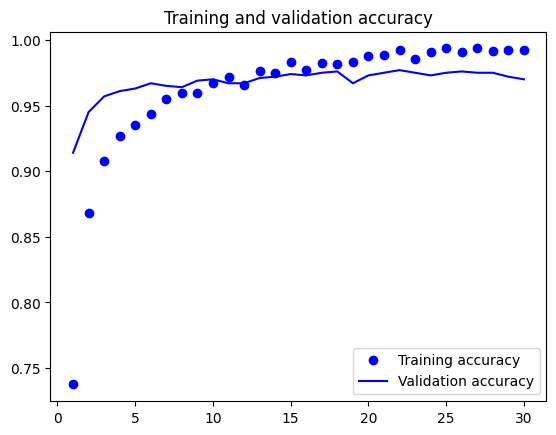

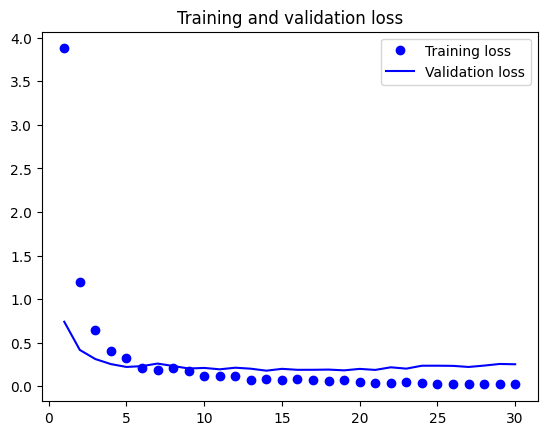

In [ ]:
import matplotlib.pyplot as plt

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

>### 약 97.2%의 검증 정확도

In [ ]:
test_model = keras.models.load_model(
    'fine_tuning.keras')

test_loss, test_acc = test_model.evaluate(test_dataset)
print(f'테스트 정확도:{test_acc:.3f}')

63/63 [==============================] - 7s 97ms/step - loss: 0.1625 - accuracy: 0.9725
테스트 정확도:0.973
